In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df=pd.read_csv(r"C:\Users\sharm\Desktop\python video\IRIS.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


1. Stats about Data

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


2. To display no. of sample of each class

In [10]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

3. Preprocessing the data

In [12]:
#checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

4. Exploratory data analysis

Histograms

<Axes: >

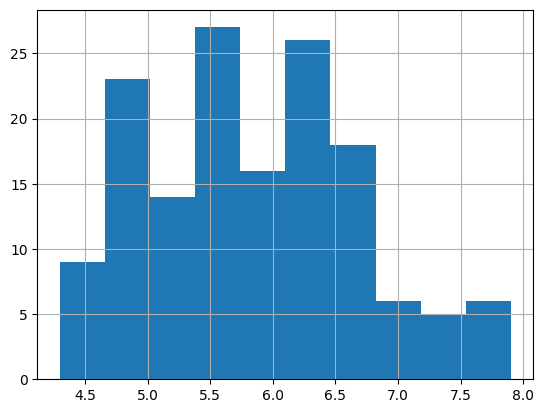

In [13]:
df['sepal_length'].hist()

<Axes: >

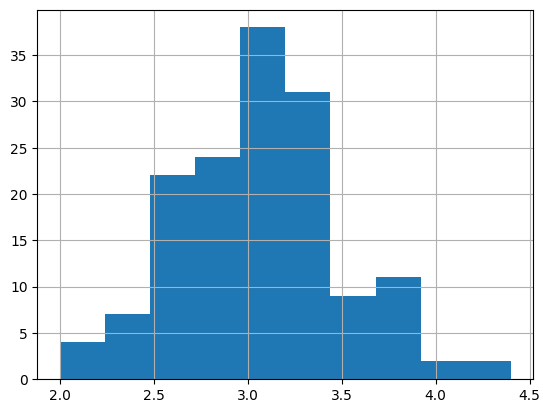

In [14]:
df['sepal_width'].hist()

<Axes: >

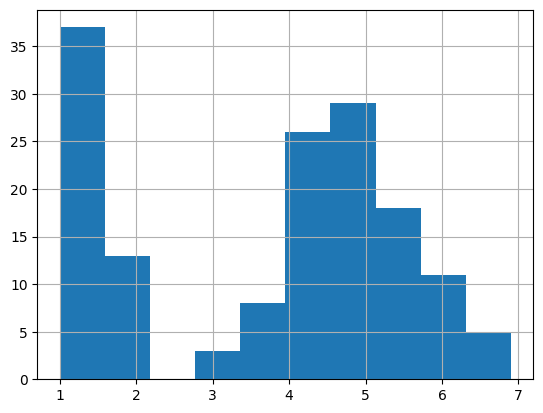

In [15]:
df['petal_length'].hist()

<Axes: >

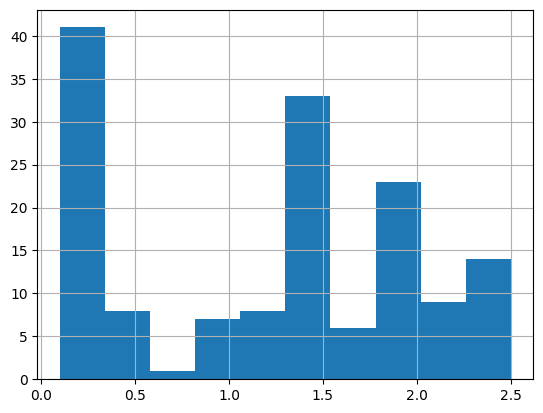

In [16]:
df['petal_width'].hist()

Scatter plot

In [31]:
colors=['red', 'yellow', 'blue']
species=['Iris-setosa' ,'Iris-versicolor', 'Iris-virginica']

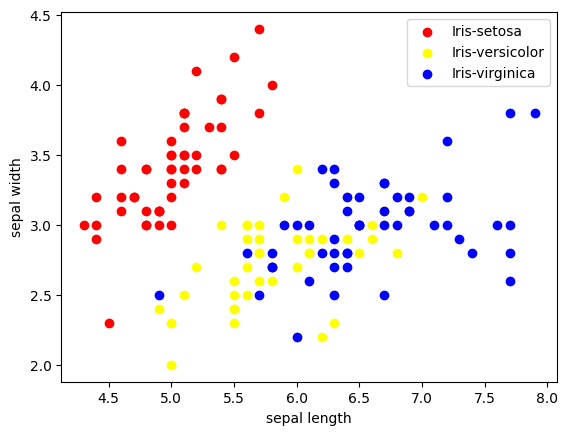

In [32]:
for i in range (3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i], label=species[i])
plt.xlabel("sepal length"), plt.ylabel("sepal width")
plt.legend()

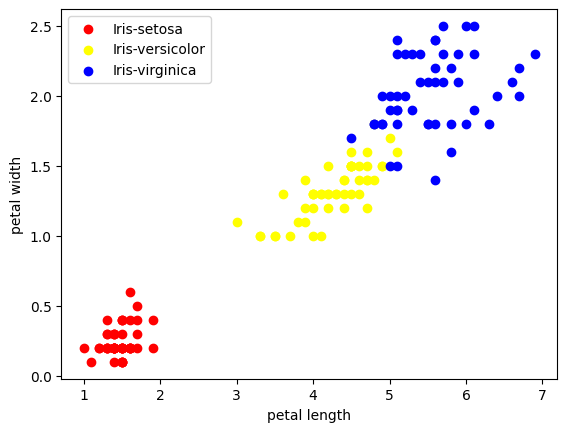

In [34]:
for i in range (3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i], label=species[i])
plt.xlabel("petal length"), plt.ylabel("petal width")
plt.legend()

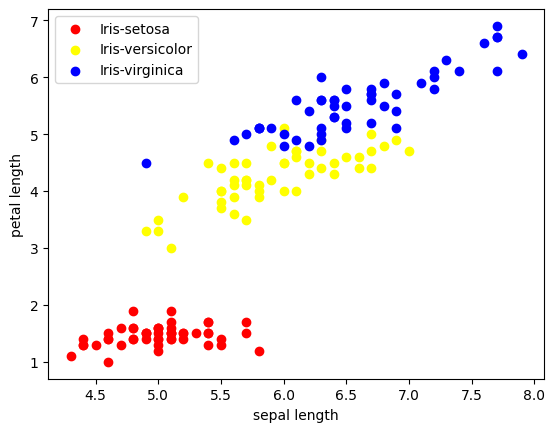

In [36]:
for i in range (3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i], label=species[i])
plt.xlabel("sepal length"), plt.ylabel("petal length")
plt.legend()

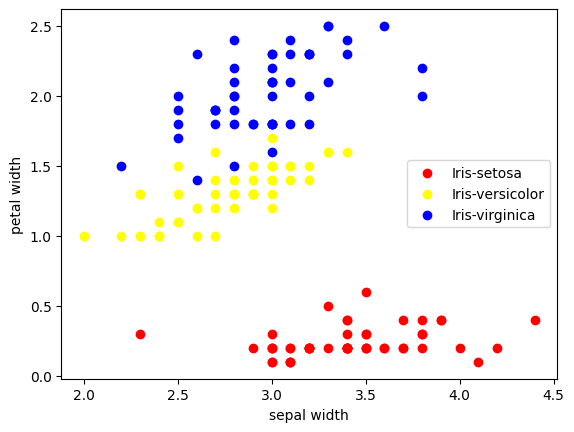

In [37]:
for i in range (3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i], label=species[i])
plt.xlabel("sepal width"), plt.ylabel("petal width")
plt.legend()

5. Correlation Matrix

In [39]:
#correlation is used to neglect the variables that have high correlation values 
data=df.drop(columns=['species'])
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

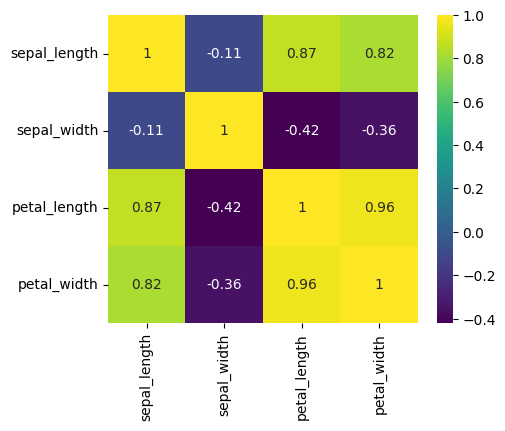

In [46]:
corr=data.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='viridis')


6. Label Encoder

In [48]:
#converting the labels into numeric form so as to convert it into machine readable form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


7. Model training

In [67]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['species'])
y=df['species']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

Logistic Regression 

In [68]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [69]:
model.fit(x_train, y_train)

LogisticRegression()

Checking Accuracy for Logistic Regression

In [70]:
print("Accuracy of training data:", model.score(x_train, y_train))

Accuracy of training data: 0.9428571428571428


In [71]:
print("Accuracy of testing data:", model.score(x_test, y_test))

Accuracy of testing data: 0.9777777777777777


K Nearest Neighbours (KNN)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [73]:
model.fit(x_train, y_train)

KNeighborsClassifier()

Checking Accuracy for KNN

In [74]:
print("Accuracy of training data:", model.score(x_train, y_train))

Accuracy of training data: 0.9619047619047619


In [75]:
print("Accuracy of testing data:", model.score(x_test, y_test))

Accuracy of testing data: 0.9777777777777777


Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [77]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

Checking Accuracy for Decision Tree

In [80]:
print("Accuracy of training data:", model.score(x_train, y_train))

Accuracy of training data: 1.0


In [79]:
print("Accuracy of testing data:", model.score(x_test, y_test))

Accuracy of testing data: 0.9555555555555556
